In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression


In [2]:
start_date="2021-12-10"
end_date="2022-12-10"

In [3]:
df_Riva=pd.read_csv(
    "..\\Riva\\DataSet_Riva_garda.csv",
    na_values="n.d."
)

df_Riva["Data"]=pd.to_datetime(df_Riva["Data"])
df_Riva.sort_values(by="Data", inplace=True)
df_Riva.set_index('Data', inplace=True)
df_Riva= df_Riva.loc[start_date:end_date,:]
df_Riva.drop(["Unnamed: 0"],axis=1,inplace=True)
df_Riva=df_Riva.reset_index().drop_duplicates(subset="Data")
df_Riva


,Data,1,NO2,Ozone,Air_humidity,Sol_rad,Temperature,Wind_speed,Qual,Station 1 - Temp (°C),Station 1 - HDO % (%Sat),Station 1 - HDO (mg/l)
0,2021-12-10 00:00:00,15533,35.0,4.0,2.90,0.0,2.75,2.90,145.0,18.75,97.0,9.04
1,2021-12-10 01:00:00,15534,31.0,7.0,3.80,0.0,3.20,3.80,145.0,18.75,96.8,9.02
2,2021-12-10 02:00:00,15535,24.0,14.0,4.70,0.0,3.70,4.70,145.0,18.78,96.4,8.98
3,2021-12-10 03:00:00,15536,20.0,22.0,5.10,0.0,3.55,5.10,145.0,18.77,96.2,8.96
4,2021-12-10 04:00:00,15537,18.0,26.0,5.10,0.0,2.55,5.10,145.0,18.76,96.1,8.96
...,...,...,...,...,...,...,...,...,...,...,...,...
8776,2022-12-10 19:00:00,24309,31.0,4.0,6.35,0.0,7.45,6.35,145.0,18.96,98.4,9.13
8777,2022-12-10 20:00:00,24310,32.0,5.0,7.50,0.0,7.80,7.50,145.0,18.96,101.1,9.38
8778,2022-12-10 21:00:00,24311,31.0,5.0,7.10,0.0,7.25,7.10,145.0,18.90,98.3,9.13
8779,2022-12-10 22:00:00,24312,29.0,5.0,6.45,0.0,7.70,6.45,145.0,18.90,96.7,8.98


In [4]:
df_Lomb=pd.read_csv(
    "..\\Lombardia\\lomb_tot.csv",
    na_values="n.d."
)

df_Lomb ["Data"]=pd.to_datetime(df_Lomb ["Data"])
df_Lomb.sort_values(by="Data", inplace=True)
df_Lomb .set_index('Data', inplace=True)
df_Lomb= df_Lomb.loc[start_date:end_date,:]
df_Lomb.drop(["Unnamed: 0"],axis=1,inplace=True)
df_Lomb=df_Lomb.reset_index().drop_duplicates(subset="Data")
df_Lomb



,Data,Ozone,Humidity,Sol_rad,Wind_speed,Wind_dir,Temp
0,2021-12-10 00:00:00,7.5,100.0,0.0,2.5,317.0,3.9
1,2021-12-10 01:00:00,20.8,100.0,0.0,2.8,331.0,3.5
2,2021-12-10 02:00:00,0.5,100.0,0.0,2.9,298.0,3.4
3,2021-12-10 03:00:00,0.7,100.0,0.0,3.0,304.0,3.4
4,2021-12-10 04:00:00,1.5,100.0,0.0,3.2,299.0,3.5
...,...,...,...,...,...,...,...
8779,2022-12-10 19:00:00,0.5,99.7,0.0,0.7,320.0,8.1
8780,2022-12-10 20:00:00,0.5,99.2,0.0,1.8,243.0,8.4
8781,2022-12-10 21:00:00,0.4,100.0,0.0,2.5,245.0,7.7
8782,2022-12-10 22:00:00,0.6,99.7,0.0,2.0,244.0,7.0


In [5]:
df_Finale=pd.DataFrame()

df_Finale.insert(0,"Data",df_Lomb["Data"])
df_Finale.insert(1,"Ozone_Lomb",df_Lomb["Ozone"])
df_Finale.insert(2,"Ozone_Riva",df_Riva["Ozone"])




df_Finale

,Data,Ozone_Lomb,Ozone_Riva
0,2021-12-10 00:00:00,7.5,4.0
1,2021-12-10 01:00:00,20.8,7.0
2,2021-12-10 02:00:00,0.5,14.0
3,2021-12-10 03:00:00,0.7,22.0
4,2021-12-10 04:00:00,1.5,26.0
...,...,...,...
8779,2022-12-10 19:00:00,0.5,5.0
8780,2022-12-10 20:00:00,0.5,6.0
8781,2022-12-10 21:00:00,0.4,NaN
8782,2022-12-10 22:00:00,0.6,NaN


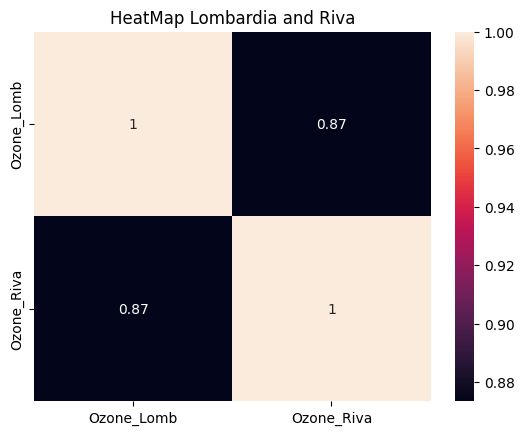

In [6]:
matrix=df_Finale.corr()
matrix=matrix.drop(["Data"],axis=0)
matrix=matrix.drop(["Data"],axis=1)

plt.figure()  # Crea una nuova figura
sns.heatmap(
    data=matrix,
    annot=True
)
matrix.style.background_gradient(cmap='coolwarm')
plt.title("HeatMap Lombardia and Riva")
plt.show()  # Mostra la figura

In [7]:
df_Finale=df_Finale.set_index("Data").reset_index()
df_Finale.dropna(inplace=True)
df_Finale

,Data,Ozone_Lomb,Ozone_Riva
0,2021-12-10 00:00:00,7.5,4.0
1,2021-12-10 01:00:00,20.8,7.0
2,2021-12-10 02:00:00,0.5,14.0
3,2021-12-10 03:00:00,0.7,22.0
4,2021-12-10 04:00:00,1.5,26.0
...,...,...,...
8776,2022-12-10 16:00:00,2.6,4.0
8777,2022-12-10 17:00:00,0.8,5.0
8778,2022-12-10 18:00:00,0.4,5.0
8779,2022-12-10 19:00:00,0.5,5.0


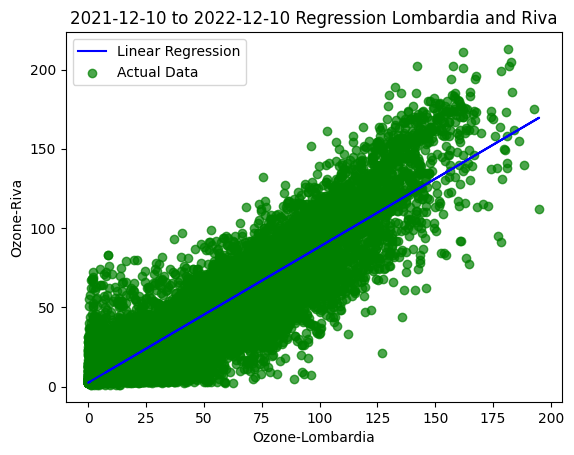

LinregressResult(slope=0.8578498481071345, intercept=2.4109898385003774, rvalue=0.8734321292872651, pvalue=0.0, stderr=0.0051515081815450515, intercept_stderr=0.39017113857104035)


In [8]:

LR =LinearRegression()
LR.fit(df_Finale["Ozone_Lomb"].values.reshape(-1,1),df_Finale["Ozone_Riva"].values)
prediction = LR.predict(df_Finale["Ozone_Lomb"].values.reshape(-1,1))
plt.plot(df_Finale["Ozone_Lomb"], prediction, label="Linear Regression", color="b")
plt.scatter(df_Finale["Ozone_Lomb"],df_Finale["Ozone_Riva"], label="Actual Data", color ="g", alpha=.7)
plt.legend()
plt.title(start_date+" to "+end_date+" Regression Lombardia and Riva")
plt.xlabel("Ozone-Lombardia")
plt.ylabel("Ozone-Riva") 
plt.show()
regress_info=linregress(df_Finale["Ozone_Lomb"], df_Finale["Ozone_Riva"])
print(linregress(df_Finale["Ozone_Lomb"], df_Finale["Ozone_Riva"]))
